# Eval the results of Flan T5 XL

In [1]:
import pandas as pd
from datasets import load_dataset
from sklearn.metrics import f1_score, precision_score, recall_score, \
    accuracy_score

In [3]:

# load
model = 'flan-t5-xl'

# load results
zero_shot = pd.read_csv(f"../zero-shot/data/{model}.csv")
zero_shot_with_system = pd.read_csv(
    f"../zero-shot-system_prompt/data/{model}.csv")
zero_shot_cot = pd.read_csv(f"../zero-shot-cot/data/{model}.csv")
two_shot = pd.read_csv(f"../2-shot/data/{model}.csv")
four_shot = pd.read_csv(f"../4-shot/data/{model}.csv")


#load pool
pool = load_dataset('mediabiasgroup/BABE-icl-pool')['train'].to_pandas()

# exclude pool from model (if needed)
zero_shot = zero_shot.merge(pool['text'], on='text', how='left',
                            indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
zero_shot_with_system = zero_shot_with_system.merge(pool['text'], on='text',
                                                    how='left',
                                                    indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
zero_shot_cot = zero_shot_cot.merge(pool['text'], on='text', how='left',
                                    indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
two_shot = two_shot.merge(pool['text'], on='text', how='left',
                          indicator=True).query('_merge == "left_only"').drop(
    '_merge', axis=1)
four_shot = four_shot.merge(pool['text'], on='text', how='left',
                            indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)



#load babe
dataset = load_dataset('mediabiasgroup/BABE-v4')
df_babe = pd.DataFrame(dataset['train'])

# df_merge = babe at begin
df_merge_all_runs = df_babe

# Zero shot

In [4]:
zero_shot.query("label == '?'")

,text,response,raw_data,query,label


In [4]:
# preprocessing

In [5]:
zero_shot = zero_shot.rename(columns={"label": "0_shot_label"})
zero_shot['0_shot_label'] = zero_shot['0_shot_label'].replace('BIASED', 1)
zero_shot['0_shot_label'] = zero_shot['0_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(zero_shot[zero_shot['0_shot_label'] != '?'][['text', '0_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot[zero_shot['0_shot_label'] != '?'][['text', '0_shot_label']], on='text')

ground_truth = df_merge['label']
zero_shot_label = df_merge['0_shot_label']

In [7]:
print("F1-Score with Flan T5 xl: ", f1_score(ground_truth, zero_shot_label))
print("Precision with Flan T5 xl: ",
      precision_score(ground_truth, zero_shot_label))
print("Recall with Flan T5 xl: ",
      recall_score(ground_truth, zero_shot_label))
print("Accuracy with Flan T5 xl: ",
      accuracy_score(ground_truth, zero_shot_label))

F1-Score with Flan T5 xl:  0.6723749436683191
Precision with Flan T5 xl:  0.6097261953412342
Recall with Flan T5 xl:  0.7493721747865394
Accuracy with Flan T5 xl:  0.6383984083561303


# zero shot with system prompt

In [8]:
zero_shot_with_system.query("label == '?'")

,text,response,raw_data,query,label
1705,Tennessee has an annual sales tax-free holiday...,Not bias,Not bias,You are an expert in media bias.\n\nInstructio...,?


In [9]:
zero_shot_with_system.loc[[1705], 'label'] = 'NOT BIASED'


In [10]:
zero_shot_with_system = zero_shot_with_system.rename(
    columns={"label": "0_shot_with_system_label"})
zero_shot_with_system['0_shot_with_system_label'] = zero_shot_with_system[
    '0_shot_with_system_label'].replace('BIASED', 1)
zero_shot_with_system['0_shot_with_system_label'] = zero_shot_with_system[
    '0_shot_with_system_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(zero_shot_with_system[zero_shot_with_system['0_shot_with_system_label'] != '?'][['text', '0_shot_with_system_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot_with_system[zero_shot_with_system['0_shot_with_system_label'] != '?'][['text', '0_shot_with_system_label']], on='text')
 
ground_truth = df_merge['label']
zero_shot_with_system_label = df_merge['0_shot_with_system_label']

In [11]:
print("F1-Score with TODO with System Prompt: ",
      f1_score(ground_truth, zero_shot_with_system_label))
print("Precision with TODO with System Prompt: ",
      precision_score(ground_truth, zero_shot_with_system_label))
print("Recall with TODO with System Prompt: ",
      recall_score(ground_truth, zero_shot_with_system_label))
print("Accuracy with TODO with System Prompt: ",
      accuracy_score(ground_truth, zero_shot_with_system_label))

F1-Score with TODO with System Prompt:  0.5209397344228806
Precision with TODO with System Prompt:  0.8086680761099366
Recall with TODO with System Prompt:  0.3842290306378704
Accuracy with TODO with System Prompt:  0.6500870430241233


# zero shot CoT

In [13]:
zero_shot_cot.query("label == '?'")

,text,response,raw_data,query,label
75,The ridicule is key here.,BIASED. The sentence is a statement of fact. T...,BIASED. The sentence is a statement of fact. T...,You are an expert in media bias.\n\nInstructio...,?
160,"Memories of smashed windows, stolen merchandis...",Not biased. The article is not biased and does...,Not biased. The article is not biased and does...,You are an expert in media bias.\n\nInstructio...,?
203,Cable news is poison.,BIASED. The sentence is not biased because it ...,BIASED. The sentence is not biased because it ...,You are an expert in media bias.\n\nInstructio...,?
237,The Heroes Act contains many leftist provision...,BIASED. The sentence is not biased because it ...,BIASED. The sentence is not biased because it ...,You are an expert in media bias.\n\nInstructio...,?
239,"On Saturday, there were numerous assaults by l...",Not biased. The sentence is not biased. The fa...,Not biased. The sentence is not biased. The fa...,You are an expert in media bias.\n\nInstructio...,?
...,...,...,...,...,...
3894,Dozens of bills to change the flag are filed i...,Not biased. The reporter did not state that th...,Not biased. The reporter did not state that th...,You are an expert in media bias.\n\nInstructio...,?
3898,A fifth of U.S. trans people reported discrimi...,Not biased because the National Center for Tra...,Not biased because the National Center for Tra...,You are an expert in media bias.\n\nInstructio...,?
4013,"Trump, of course, is his most stunning when he...",Not biased. The sentence is not biased. It is ...,Not biased. The sentence is not biased. It is ...,You are an expert in media bias.\n\nInstructio...,?
4039,"April, typically a big revenue month for U.S. ...",Not biased. The article is not biased. It is u...,Not biased. The article is not biased. It is u...,You are an expert in media bias.\n\nInstructio...,?


In [14]:
# preprocessing
def update_label(row):
    if row['response'].startswith('BIASED') and row['label'] == '?':
        return 'BIASED'
    elif row['response'].startswith('NOT BIASED') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('not biased') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('Not biased') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('Not based') and row[
        'label'] == '?':
        return 'NOT BIASED'
    else:
        return row['label']


zero_shot_cot['label'] = zero_shot_cot.apply(update_label, axis=1)
zero_shot_cot.query("label == '?'")

,text,response,raw_data,query,label


In [15]:
zero_shot_cot = zero_shot_cot.rename(columns={"label": "0_shot_cot_label"})
zero_shot_cot['0_shot_cot_label'] = zero_shot_cot['0_shot_cot_label'].replace(
    'BIASED', 1)
zero_shot_cot['0_shot_cot_label'] = zero_shot_cot['0_shot_cot_label'].replace(
    'NOT BIASED', 0)
    
df_merge = df_babe.merge(zero_shot_cot[zero_shot_cot['0_shot_cot_label'] != '?'][['text', '0_shot_cot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot_cot[zero_shot_cot['0_shot_cot_label'] != '?'][['text', '0_shot_cot_label']], on='text')
 
ground_truth = df_merge['label']
zero_shot_cot_label = df_merge['0_shot_cot_label']

In [16]:
print("F1-Score with TODO with CoT: ",
      f1_score(ground_truth, zero_shot_cot_label))
print("Precision with TODO with CoT: ",
      precision_score(ground_truth, zero_shot_cot_label))
print("Recall with TODO with CoT: ",
      recall_score(ground_truth, zero_shot_cot_label))
print("Accuracy with TODO with CoT: ",
      accuracy_score(ground_truth, zero_shot_cot_label))

F1-Score with TODO with CoT:  0.5494648070061628
Precision with TODO with CoT:  0.7756410256410257
Recall with TODO with CoT:  0.425414364640884
Accuracy with TODO with CoT:  0.6545635414076101


# 2-shot

In [17]:
two_shot.query("label == '?'")

,text,response,raw_data,query,label


In [16]:
# preprocessing

In [17]:
two_shot = two_shot.rename(columns={"label": "2_shot_label"})
two_shot['2_shot_label'] = two_shot['2_shot_label'].replace('BIASED', 1)
two_shot['2_shot_label'] = two_shot['2_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(two_shot[two_shot['2_shot_label'] != '?'][['text', '2_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(two_shot[two_shot['2_shot_label'] != '?'][['text', '2_shot_label']], on='text')

ground_truth = df_merge['label']
two_shot_label = df_merge['2_shot_label']

In [18]:
print("F1-Score with TODO with (2 shot): ",
      f1_score(ground_truth, two_shot_label))
print("Precision with TODO with (2 shot): ",
      precision_score(ground_truth, two_shot_label))
print("Recall with TODO with (2 shot): ",
      recall_score(ground_truth, two_shot_label))
print("Accuracy with TODO with (2 shot): ",
      accuracy_score(ground_truth, two_shot_label))

F1-Score with TODO with (2 shot):  0.6342182890855458
Precision with TODO with (2 shot):  0.7684060042887777
Recall with TODO with (2 shot):  0.5399296835760924
Accuracy with TODO with (2 shot):  0.6916190002486944


# 4-shot

In [18]:
four_shot.query("label == '?'")

,text,response,raw_data,query,label


In [20]:
# preprocessing

In [19]:
four_shot = four_shot.rename(columns={"label": "4_shot_label"})
four_shot['4_shot_label'] = four_shot['4_shot_label'].replace('BIASED', 1)
four_shot['4_shot_label'] = four_shot['4_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(four_shot[four_shot['4_shot_label'] != '?'][['text', '4_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(four_shot[four_shot['4_shot_label'] != '?'][['text', '4_shot_label']], on='text')

ground_truth = df_merge['label']
four_shot_label = df_merge['4_shot_label']

In [20]:
print("F1-Score with TODO with (4 shot): ",
      f1_score(ground_truth, four_shot_label))
print("Precision with TODO with (4 shot): ",
      precision_score(ground_truth, four_shot_label))
print("Recall with TODO with (4 shot): ",
      recall_score(ground_truth, four_shot_label))
print("Accuracy with TODO with (4 shot): ",
      accuracy_score(ground_truth, four_shot_label))

F1-Score with TODO with (4 shot):  0.6050836949783014
Precision with TODO with (4 shot):  0.7902834008097166
Recall with TODO with (4 shot):  0.49020592667001506
Accuracy with TODO with (4 shot):  0.6831633921909973


# Comparison and plots

KeyError: '8_shot_label'

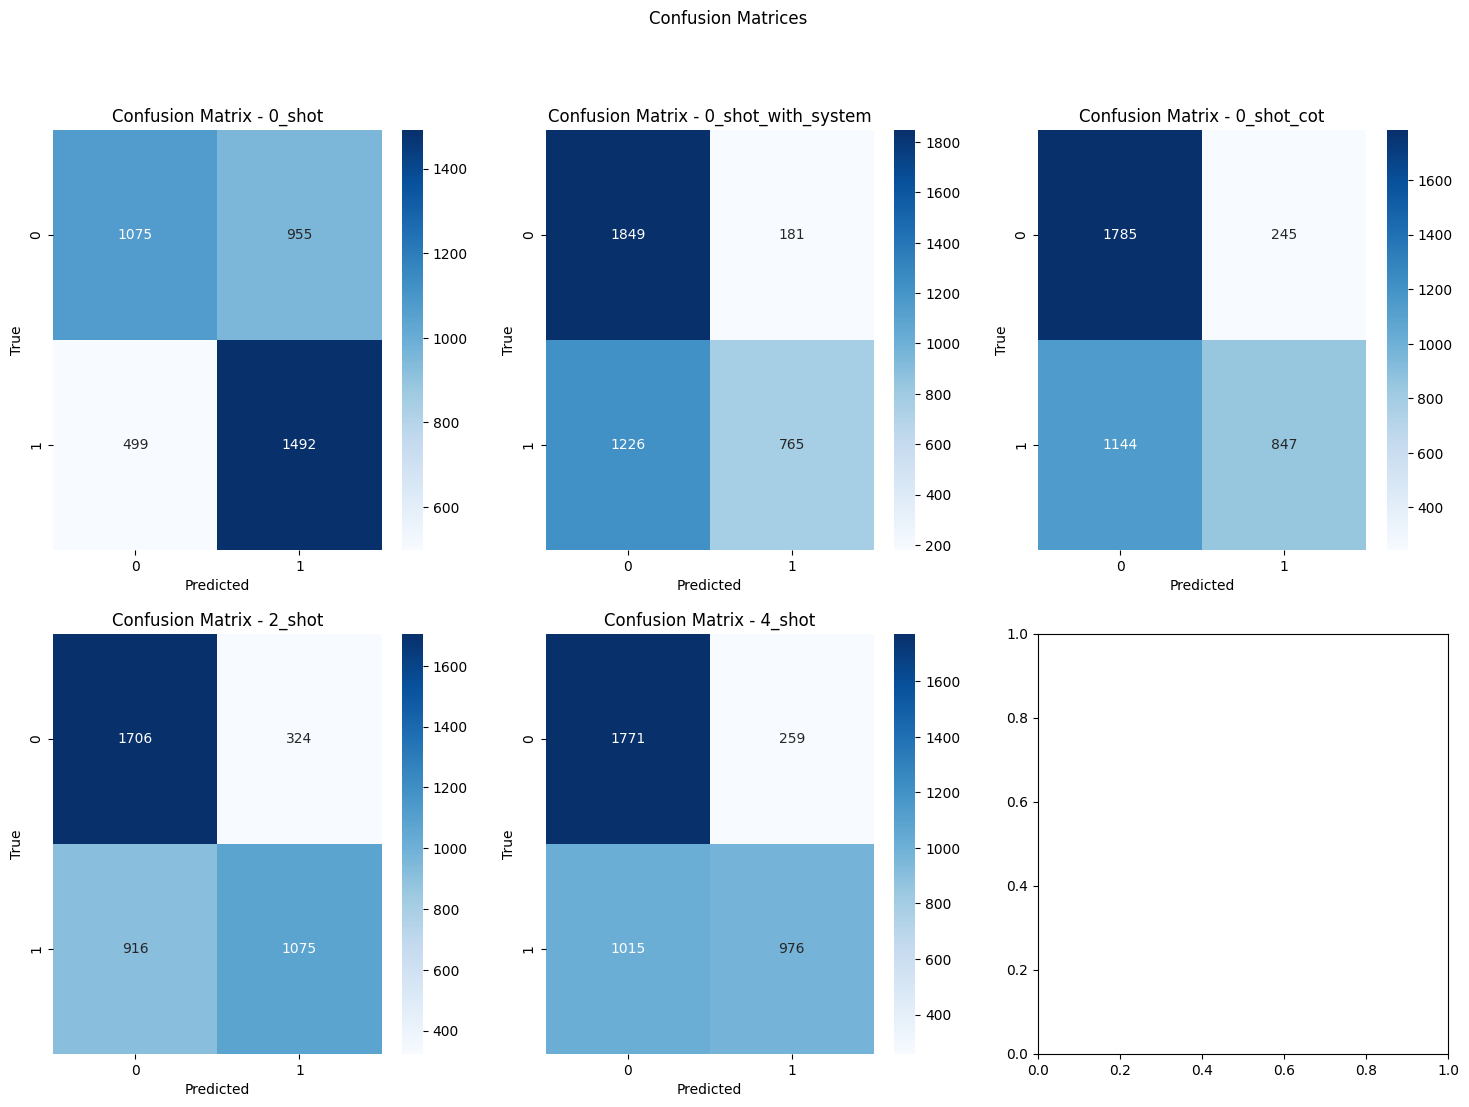

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(ax, df, true_labels_column, predicted_labels_column,
                          title=None
                          ): 
    predicted_labels = df[f'{predicted_labels_column}']
    true_labels = df[f'{true_labels_column}']

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)


    # Display confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True,
                yticklabels=True, ax=ax)

    title = title if title else predicted_labels_column

    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')


# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices')

# Plot each confusion matrix
plot_confusion_matrix(axes[0, 0], df_merge, 'label', '0_shot_label', '0_shot')
plot_confusion_matrix(axes[0, 1], df_merge, 'label',
                      '0_shot_with_system_label', '0_shot_with_system')
plot_confusion_matrix(axes[0, 2], df_merge, 'label', '0_shot_cot_label',
                      '0_shot_cot')
plot_confusion_matrix(axes[1, 0], df_merge, 'label', '2_shot_label', '2_shot')
plot_confusion_matrix(axes[1, 1], df_merge, 'label', '4_shot_label', '4_shot')
plot_confusion_matrix(axes[1, 2], df_merge, 'label', '8_shot_label', '8_shot')

plt.tight_layout(
    rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

# Krippendorff Alpha in model

In [ ]:
import krippendorff

runs = ['0_shot_label', '0_shot_with_system_label', '0_shot_cot_label',
        '2_shot_label', '4_shot_label', '8_shot_label']


def compute_krippendorff_alpha(df, predicted_columns):
    pred_map = {}
    for run in predicted_columns:
        predicted_labels = df[run]
        pred_map[run] = predicted_labels

    # Check if there is variability in the ratings
    unique_labels_counts = df[predicted_columns].nunique(axis=1)
    if unique_labels_counts.max() == 1:
        # All ratings are the same, return a special value or handle accordingly
        return 0

    reliability_data = df[predicted_columns].values.tolist()

    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(reliability_data=list(pred_map.values()),
                               level_of_measurement='nominal')

    return alpha


In [ ]:
alpha_value = compute_krippendorff_alpha(df_merge, runs)
print(f"Krippendorff's Alpha (all runs): {alpha_value}")

In [ ]:
import itertools

def compute_krippendorff_alpha_for_k_runs(df, runs, k=None):
    # Initialize variables to store the best combination and alpha
    if k is None:
        k = len(runs)

    best_combination = None
    best_alpha = 0  # Assuming alpha ranges from 0 to 1

    # Iterate through all possible combinations
    for combination in itertools.combinations(runs, k):

        alpha_value = compute_krippendorff_alpha(df, list(combination))

        # Print alpha for the current combination
        print(f"Combination: {combination}, Alpha: {alpha_value}")

        # Update best combination and alpha if a higher alpha is found
        if alpha_value > best_alpha:
            best_alpha = alpha_value
            best_combination = combination

    # Print the best combination and alpha
    print(f"\nBest Combination: {best_combination}, Best Alpha: {best_alpha}")
    return best_alpha, best_combination

In [ ]:
compute_krippendorff_alpha_for_k_runs(df_merge, runs, 2)